In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.9 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [2]:
import os
import cv2
import torch
import yaml
import math 
import time
import pandas as pd
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Image, clear_output
from PIL import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
print(f"The pytorch verison is : {torch.__version__}")
print(f"The CUDA is available or not : {torch.cuda.is_available()}")
print(f"How many GPU is available :{torch.cuda.device_count()}")
print(f"Name of using GPU is : {torch.cuda.get_device_name()}")

# display using gpu info 
a=!nvidia-smi
print("The using GPU information :")
print("\n".join(a))

The pytorch verison is : 2.6.0+cu124
The CUDA is available or not : True
How many GPU is available :2
Name of using GPU is : Tesla T4
The using GPU information :
Wed Jun 25 07:49:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       3MiB /  15360MiB |  

# Fine-Tune YOLOv11m Model :

In [4]:
def fine_tune_function(dataset_path, model_name, epochs, batch_size, proj_dir, run_name):
    if not dataset_path:
        print("dataset_path cant found")
        return None, None, None
    
    # load the YOLOv11n pretrained model 
    try:
        print("Loading the model from ultralytics :")
        model=YOLO(model_name)
    except Exception as e:
        print(f"Error occurred during load the model: {e}")
        return None, None, None

    # create project directory 
    try:
        print("creating project directory :")
        results_dir=os.path.join(proj_dir, run_name)
        print(f"Project directory has been created to this [{results_dir}] path.")
    except Exception as e:
        print(f"Error occurred during creating project project directory: {e}")
        return None, None, None
        
    # fine tune the model
    try:
        print(f"The training results will be saved to this [{results_dir}] path.")
        print("Starting The Training..................................................................")
        start_time=time.time()
        results=model.train(data=os.path.join(dataset_path, "data.yaml"),
                            seed=42,
                            epochs=epochs,
                            patience=100,
                            batch=batch_size,
                            imgsz=640,
                            device=0, # for multi GPU device=[0,1]
                            workers=4,

                            # Ultralytice by defult augmentation parameters
                             degrees=10.0,  # Rotattion (±10°)
                             flipud=0.9,    # No vertical flip
                             fliplr=0.9,    # Horizontal flip (90% chance)
                            # hsv_h=0.0,     # No hue change
                            # hsv_s=0.0,     # No saturation change
                             hsv_v=0.4,     # Contrast adjustment (brightness)
                            # translate=0.0, # No translate
                            # scale=0.0,     # No scaling
                            # shear=0.0,     # No shearing
                            # perspective=0.0, # No perspective
                            # mosaic=0.0,    # Disable mosaic
                            # mixup=0.0,     # Disable mixup
                            # copy_paste=0.0,# Disable copy_paste
        
                            # Other training parameters
                            lr0=0.001,
                            lrf=0.1,
                            momentum=0.98,
                            weight_decay=0.005,
                            warmup_epochs=3,
                            warmup_momentum=0.9,
                            warmup_bias_lr=0.1,
                            cos_lr=True,

                            # Validation & Saving
                            save=True,
                            #save_period=10,
                            val=True,
                            plots=True,
                           
                            # Project Organizing 
                            exist_ok=True, # allows overwriting of an existing project/name directory
                            project=proj_dir, # name of the project directory where training outputs are saved
                            name=run_name, # used for creating a subdirectory within the project folder, where training logs and outputs are stored
                           
                            verbose=True)   
        
        total_training_time=time.time()-start_time
        print(f"Training has been completed.\nTotal training time : {total_training_time:.2f} sec, {total_training_time/60:.2f} min, {total_training_time/3600:.2f} hours")
    except Exception as e:
        print(f"Error occurred during train the model: {e}")
        return None, None, None

    # Save the best model in the dedicated path 
    try:
        print("Saving the fine tune model :")
        best_model_path=os.path.join(proj_dir, run_name, "weights/best.pt")
        if os.path.exists(best_model_path): 
            print(f"The fine tune model has been saved to this [{best_model_path}] path")
        else:
            print(f"WARNING-The fine tune model has 'NOT' been saved to this [{best_model_path}] path")
            return None,None, None
    except Exception as e:
        print(f"Error occurred during save the fine tune model: {e}")
        return None, None, None

    return best_model_path, run_name, results

In [5]:
# Fine tune the model using own custome dataset
best_model_path, run_name, training_results = fine_tune_function(dataset_path="/kaggle/input/factory-production-line-data", 
                   model_name="yolo11m.pt" , 
                   epochs=300, 
                   batch_size=-1, # this will automatically determines the optimal batch size based on available GPU memory                     
                   proj_dir="/kaggle/working/runs/detect",
                   run_name="Factory-Production-Line-Objects-Detect-Track-And-Count")

Loading the model from ultralytics :


100%|██████████| 38.8M/38.8M [00:00<00:00, 223MB/s]


creating project directory :
Project directory has been created to this [/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count] path.
The training results will be saved to this [/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count] path.
Starting The Training..................................................................
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/input/factory-production-line-data/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=True, fliplr=0.9, flipud=0.9, format=torchscript, fraction=1.0, freeze=None, half=F

100%|██████████| 755k/755k [00:00<00:00, 17.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 23.6±4.4 MB/s, size: 95.7 KB)


train: Scanning /kaggle/input/factory-production-line-data/train/labels... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<00:00, 229.95it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/factory-production-line-data/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.21G reserved, 0.21G allocated, 14.32G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    20053779       68.19         1.669         59.51         208.3        (1, 3, 640, 640)                    list
    20053779       136.4         2.326         56.54         142.8        (2, 3, 640, 640)                    list
    20053779       272.8         3.391         56.02         127.3        (4, 3, 640, 640)                    list
    20053779       545.5         5.572          90.2         182.9        (8, 3, 640, 640)                    list
    20053779        1091         9.

train: Scanning /kaggle/input/factory-production-line-data/train/labels... 36 images, 0 backgrounds, 0 corrupt: 100%|██████████| 36/36 [00:00<00:00, 1001.21it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/factory-production-line-data/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 16.1±4.1 MB/s, size: 66.7 KB)


val: Scanning /kaggle/input/factory-production-line-data/valid/labels... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 231.43it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/factory-production-line-data/valid is not writeable, cache not saved.


Plotting labels to /kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.98' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0054687500000000005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      7.11G      1.653      3.665       1.51        334        640: 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all          4         95      0.592      0.168       0.27      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      7.11G      1.599      3.251      1.492        200        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.06it/s]

                   all          4         95      0.756      0.783      0.863      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      7.12G      1.188       1.21      1.112        328        640: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.93it/s]

                   all          4         95      0.574      0.568      0.545      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      7.19G      1.006     0.8736       1.02        292        640: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.59it/s]

                   all          4         95        0.7      0.811      0.685      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      7.25G       1.04     0.7811      1.026        295        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]

                   all          4         95          1      0.653      0.922      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      7.35G     0.9359     0.7053      0.999        321        640: 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]

                   all          4         95      0.679      0.884      0.861      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      7.51G      0.918     0.6254     0.9732        305        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.47it/s]

                   all          4         95      0.969      0.663      0.893      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      7.38G      1.123     0.7183      1.011        217        640: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.73it/s]

                   all          4         95      0.861      0.842      0.921       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      7.23G     0.8891     0.6452     0.9725        291        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]

                   all          4         95      0.699      0.884      0.893      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      7.32G     0.9855     0.6878      1.003        237        640: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.75it/s]

                   all          4         95      0.482      0.705      0.584      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      7.36G      1.087     0.6964      1.014        262        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.44it/s]

                   all          4         95     0.0613      0.611     0.0516     0.0336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      7.33G     0.9752     0.6191     0.9736        284        640: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]

                   all          4         95    0.00333     0.0421    0.00181    0.00145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      7.33G      0.861     0.5637     0.9606        257        640: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]

                   all          4         95   0.000833     0.0105   0.000422   0.000337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300       7.4G     0.9523     0.6247     0.9905        262        640: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.09it/s]

                   all          4         95     0.0671      0.263     0.0363     0.0171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      7.28G     0.9585     0.5695     0.9821        281        640: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.56it/s]

                   all          4         95    0.00944     0.0737    0.00388    0.00131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      7.35G      0.855      0.627     0.9788        256        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.17it/s]

                   all          4         95   0.000833     0.0105   0.000428   0.000171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      7.41G     0.9253     0.5817     0.9713        243        640: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.95it/s]

                   all          4         95    0.00246     0.0211   0.000914   0.000232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      7.31G     0.9149     0.5898     0.9793        266        640: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.82it/s]

                   all          4         95   0.000833     0.0105   0.000422   4.22e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      7.38G     0.8659     0.6021     0.9699        223        640: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.70it/s]

                   all          4         95          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      7.32G     0.8863     0.5346     0.9763        244        640: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.38it/s]

                   all          4         95    0.00535     0.0211    0.00153   0.000153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      7.38G     0.9084     0.6503      0.971        274        640: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.76it/s]

                   all          4         95    0.00676     0.0316    0.00234   0.000279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      7.25G     0.8874     0.5668     0.9522        258        640: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.96it/s]

                   all          4         95    0.00333     0.0421    0.00177   0.000525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      7.31G     0.9568     0.6253     0.9766        239        640: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.71it/s]

                   all          4         95          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      7.38G     0.8982     0.5991     0.9796        341        640: 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.05it/s]

                   all          4         95          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300      7.32G     0.9529     0.5923      1.003        183        640: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.04it/s]

                   all          4         95          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      7.37G     0.9987     0.6139      0.976        319        640: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.79it/s]

                   all          4         95          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      7.27G     0.9293     0.6031     0.9987        254        640: 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.57it/s]

                   all          4         95          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      7.29G     0.8933     0.5589     0.9471        304        640: 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.53it/s]

                   all          4         95          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      7.36G      1.052     0.6093      1.034        228        640: 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.68it/s]

                   all          4         95          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      7.21G     0.9394     0.6061     0.9978        290        640: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.40it/s]

                   all          4         95          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      7.24G      0.931     0.5933     0.9485        291        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.45it/s]

                   all          4         95    0.00333     0.0421    0.00175   0.000781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      7.31G     0.8963     0.5432     0.9622        289        640: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]

                   all          4         95    0.00333     0.0421    0.00175   0.000781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      7.37G     0.8738     0.5467      0.962        272        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.58it/s]

                   all          4         95     0.0267      0.337     0.0187    0.00477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      7.28G     0.9404     0.6031     0.9827        209        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.87it/s]

                   all          4         95       0.01      0.126     0.0077    0.00165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      7.34G     0.8202     0.5524     0.9564        225        640: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.63it/s]

                   all          4         95       0.01      0.126     0.0077    0.00165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      7.38G     0.7733     0.5208     0.9295        189        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.60it/s]

                   all          4         95   0.000853     0.0105   0.000428   4.28e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      7.34G     0.8728     0.5513     0.9535        187        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]

                   all          4         95   0.000853     0.0105   0.000428   4.28e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300      7.39G     0.8484     0.5642     0.9402        201        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.53it/s]

                   all          4         95    0.00333     0.0421    0.00175   0.000691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      7.26G     0.8439     0.5778     0.9436        241        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.30it/s]

                   all          4         95   0.000833     0.0105   0.000489   0.000196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      7.33G     0.8194     0.5109     0.9522        268        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.67it/s]

                   all          4         95   0.000833     0.0105   0.000489   0.000196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      7.37G     0.7954     0.4909     0.9193        272        640: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.01it/s]

                   all          4         95     0.0135      0.105    0.00858    0.00246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      7.34G     0.8253     0.5294     0.9641        210        640: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.87it/s]

                   all          4         95     0.0135      0.105    0.00858    0.00246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      7.37G     0.8151     0.5035     0.9235        234        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.08it/s]

                   all          4         95     0.0164      0.179     0.0104    0.00207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300      7.28G     0.8302     0.5072     0.9379        258        640: 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.28it/s]

                   all          4         95     0.0133      0.168     0.0091     0.0023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      7.29G      0.843     0.5127     0.9426        389        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.25it/s]

                   all          4         95     0.0133      0.168     0.0091     0.0023



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      7.33G     0.8074     0.4907     0.9204        398        640: 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all          4         95    0.00734     0.0632    0.00288    0.00116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      7.21G     0.7701     0.4858     0.9295        199        640: 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.04it/s]

                   all          4         95    0.00734     0.0632    0.00288    0.00116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      7.24G     0.9292     0.5076     0.9607        403        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.10it/s]

                   all          4         95     0.0055     0.0316     0.0019   0.000431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300       7.3G     0.8805     0.4919     0.9611        212        640: 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all          4         95      0.161     0.0737     0.0449     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300      7.37G     0.8101     0.5004     0.9428        192        640: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all          4         95      0.161     0.0737     0.0449     0.0177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300       7.3G     0.9043     0.5194     0.9853        238        640: 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.49it/s]

                   all          4         95      0.201     0.0737     0.0455     0.0184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      7.31G     0.8037     0.4661     0.9329        319        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.66it/s]

                   all          4         95      0.201     0.0737     0.0455     0.0184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      7.38G     0.7726     0.4645     0.9232        274        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.42it/s]

                   all          4         95   0.000954     0.0105   0.000424   8.48e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      7.25G     0.8401     0.4761     0.9485        188        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.22it/s]

                   all          4         95    0.00101     0.0105   0.000424    0.00017



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      7.32G     0.8242      0.482     0.9317        430        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.78it/s]

                   all          4         95    0.00101     0.0105   0.000424    0.00017



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      7.36G     0.8594     0.4793     0.9449        269        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]

                   all          4         95     0.0325     0.0421    0.00622    0.00164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      7.27G      0.929     0.4972     0.9784        227        640: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.99it/s]

                   all          4         95     0.0325     0.0421    0.00622    0.00164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300      7.27G     0.8158     0.4906     0.9442        308        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.87it/s]

                   all          4         95      0.211     0.0842     0.0493     0.0252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      7.33G       0.74     0.4635     0.9245        249        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.50it/s]

                   all          4         95      0.204     0.0526     0.0482     0.0202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      7.39G     0.9803      0.501      0.982        183        640: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all          4         95      0.204     0.0526     0.0482     0.0202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      7.33G     0.8059     0.4649      0.941        294        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all          4         95      0.826     0.0421     0.0551      0.035



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      7.39G     0.7818     0.4793      0.924        331        640: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]

                   all          4         95      0.826     0.0421     0.0551      0.035



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300       7.3G     0.9669     0.5184      1.003        246        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all          4         95      0.063     0.0211     0.0117    0.00309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      7.37G      1.011     0.5431      1.028        199        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.29it/s]

                   all          4         95     0.0705     0.0316     0.0128    0.00592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      7.44G     0.8551     0.4741     0.9424        314        640: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all          4         95     0.0705     0.0316     0.0128    0.00592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      7.34G     0.9083     0.4944     0.9771        218        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]

                   all          4         95      0.467      0.221      0.212      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300       7.4G     0.8351     0.4918     0.9558        193        640: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.07it/s]

                   all          4         95      0.467      0.221      0.212      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      7.35G     0.8457     0.4826      0.933        278        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.30it/s]

                   all          4         95      0.367      0.221      0.176      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      7.41G     0.8063     0.4625     0.9321        230        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

                   all          4         95      0.568       0.25      0.286       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      7.27G     0.7211     0.4222     0.9074        258        640: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.79it/s]

                   all          4         95      0.568       0.25      0.286       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300      7.31G     0.7203     0.4295     0.9023        263        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.04it/s]

                   all          4         95      0.848      0.765      0.855      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300       7.4G     0.7671     0.4443      0.908        298        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.52it/s]

                   all          4         95      0.848      0.765      0.855      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      7.34G       0.78     0.4431     0.9208        285        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.96it/s]

                   all          4         95      0.796      0.789      0.863      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      7.41G     0.7706     0.4438     0.9173        255        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.20it/s]

                   all          4         95      0.758      0.726      0.812      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      7.25G     0.7586     0.4399     0.9223        230        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.71it/s]

                   all          4         95      0.758      0.726      0.812      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      7.29G     0.7183     0.4479     0.9159        190        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.77it/s]

                   all          4         95      0.763      0.779      0.834      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      7.38G     0.7348     0.4318     0.9025        328        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.97it/s]

                   all          4         95      0.763      0.779      0.834      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300      7.36G     0.7834     0.4513     0.9231        283        640: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all          4         95      0.792      0.863      0.891      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300       7.2G     0.7473     0.4588     0.9292        229        640: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.84it/s]

                   all          4         95      0.889      0.811      0.871      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      7.24G      0.718     0.4317      0.926        259        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.96it/s]

                   all          4         95      0.889      0.811      0.871      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      7.29G     0.7107     0.4254     0.8981        302        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.06it/s]

                   all          4         95      0.721      0.708      0.736       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      7.37G     0.7747     0.4232     0.9125        229        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.40it/s]

                   all          4         95      0.721      0.708      0.736       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      7.34G     0.7754     0.4409     0.9079        312        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.04it/s]

                   all          4         95      0.809      0.711      0.774      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300      7.41G      0.705     0.4305     0.9234        148        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.44it/s]

                   all          4         95      0.859      0.821      0.917      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      7.27G     0.6885     0.4169     0.8892        239        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.22it/s]

                   all          4         95      0.859      0.821      0.917      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      7.32G      0.738     0.4271     0.9144        218        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.14it/s]

                   all          4         95      0.856      0.779      0.873       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300       7.4G     0.6306     0.4145     0.8788        227        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.02it/s]

                   all          4         95      0.856      0.779      0.873       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      7.34G     0.6743     0.4138     0.9115        184        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.24it/s]

                   all          4         95      0.893      0.883      0.925      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300       7.4G     0.6565      0.401     0.8944        310        640: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.44it/s]

                   all          4         95      0.924      0.832      0.938      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      7.28G     0.7924     0.4485     0.9006        388        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.15it/s]

                   all          4         95      0.924      0.832      0.938      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      7.33G     0.7128     0.4256     0.9095        167        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.10it/s]

                   all          4         95       0.89      0.848      0.924      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      7.24G       0.68     0.4032     0.8953        262        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]

                   all          4         95       0.89      0.848      0.924      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      7.28G     0.6725     0.3964     0.8812        325        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.01it/s]

                   all          4         95      0.868      0.762      0.864      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300      7.34G     0.6592      0.395     0.8772        253        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.34it/s]

                   all          4         95      0.826      0.848      0.909      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300       7.4G     0.6975     0.3998     0.9032        236        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.43it/s]

                   all          4         95      0.826      0.848      0.909      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300       7.3G     0.6457     0.4023     0.8845        306        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.25it/s]

                   all          4         95      0.841      0.747      0.836       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300      7.37G      0.671     0.4156     0.9105        232        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all          4         95      0.841      0.747      0.836       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      7.24G     0.7019     0.4194     0.9147        166        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all          4         95      0.693      0.611      0.609      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      7.27G     0.8302     0.4294     0.9104        333        640: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.98it/s]

                   all          4         95      0.744      0.611      0.649      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      7.33G     0.7318       0.42     0.8968        259        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.07it/s]

                   all          4         95      0.744      0.611      0.649      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      7.38G     0.7515     0.4338     0.9168        268        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.68it/s]

                   all          4         95      0.913       0.88      0.945        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      7.38G     0.7467     0.4124     0.8969        345        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all          4         95      0.913       0.88      0.945        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      7.33G     0.7558     0.4215     0.9173        223        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.66it/s]

                   all          4         95      0.897      0.905      0.935      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      7.39G     0.7193     0.4192     0.9111        256        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.42it/s]

                   all          4         95      0.931      0.916      0.947      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      7.22G     0.6689     0.4031     0.9021        233        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.38it/s]

                   all          4         95      0.931      0.916      0.947      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      7.27G     0.6508     0.4095     0.8882        205        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]

                   all          4         95       0.94      0.874      0.957      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      7.35G     0.6907     0.4054     0.9023        248        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.50it/s]

                   all          4         95       0.94      0.874      0.957      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      7.25G     0.6746     0.4141     0.9119        190        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]

                   all          4         95      0.945      0.911      0.954      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      7.26G     0.5961      0.388      0.878        229        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.82it/s]

                   all          4         95      0.956      0.912      0.953       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      7.33G     0.7018     0.3978     0.8998        252        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]

                   all          4         95      0.956      0.912      0.953       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      7.38G     0.6299     0.3713     0.8883        257        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.00it/s]

                   all          4         95       0.97      0.905      0.955      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      7.34G      0.598     0.3822     0.8676        252        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.74it/s]

                   all          4         95       0.97      0.905      0.955      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      7.41G     0.6178       0.37     0.8876        224        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.96it/s]

                   all          4         95      0.956      0.917      0.957      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      7.36G     0.6815        0.4     0.8999        287        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.41it/s]

                   all          4         95      0.931      0.926      0.961      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      7.42G     0.6784     0.4011     0.9028        179        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]

                   all          4         95      0.931      0.926      0.961      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      7.29G     0.5958     0.3665     0.8684        236        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]

                   all          4         95      0.924      0.898      0.956      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      7.37G     0.6599     0.3852     0.8858        223        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]

                   all          4         95      0.924      0.898      0.956      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      7.26G     0.6324     0.3919     0.8831        291        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.08it/s]

                   all          4         95      0.911      0.926      0.961      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      7.29G     0.6185     0.3847     0.8692        311        640: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.28it/s]

                   all          4         95      0.899      0.905      0.959      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      7.36G     0.6229     0.3652     0.8711        226        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.40it/s]

                   all          4         95      0.899      0.905      0.959      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      7.24G     0.6194     0.3657     0.8831        209        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.44it/s]

                   all          4         95      0.955      0.891      0.966       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      7.25G     0.6163     0.3738     0.8717        223        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.48it/s]

                   all          4         95      0.955      0.891      0.966       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      7.32G     0.6186     0.3642     0.8784        247        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]

                   all          4         95      0.945      0.916      0.967      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      7.39G     0.6271     0.3574     0.8776        240        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.61it/s]

                   all          4         95      0.938      0.895      0.964      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      7.29G     0.6045     0.3677     0.8795        291        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]

                   all          4         95      0.938      0.895      0.964      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      7.34G     0.6235     0.3635      0.871        262        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.01it/s]

                   all          4         95      0.908      0.947      0.961      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      7.24G     0.6366     0.3707     0.8717        258        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.76it/s]

                   all          4         95      0.908      0.947      0.961      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      7.26G     0.6348     0.3677     0.8848        223        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all          4         95      0.898      0.931      0.955      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      7.32G     0.6141     0.3582     0.8654        266        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.18it/s]

                   all          4         95      0.886      0.937      0.954      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      7.39G     0.6061      0.368     0.8723        336        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.28it/s]

                   all          4         95      0.886      0.937      0.954      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      7.32G     0.6254     0.3702     0.8743        277        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.33it/s]

                   all          4         95      0.914      0.898      0.949      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      7.39G     0.5993     0.3606     0.8728        340        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.08it/s]

                   all          4         95      0.914      0.898      0.949      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      7.34G     0.6318     0.3696      0.878        298        640: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]

                   all          4         95      0.937      0.895      0.949      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      7.41G     0.6033     0.3584     0.8637        279        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.68it/s]

                   all          4         95      0.918      0.916      0.949       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      7.26G      0.588      0.367     0.8716        326        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.32it/s]

                   all          4         95      0.918      0.916      0.949       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300       7.3G     0.6025     0.3614     0.8721        253        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.07it/s]

                   all          4         95      0.947      0.933      0.952      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      7.39G     0.5832     0.3588     0.8636        275        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.74it/s]

                   all          4         95      0.947      0.933      0.952      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      7.34G     0.5437     0.3403     0.8595        251        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all          4         95      0.929      0.937      0.952      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300       7.4G     0.5614     0.3349     0.8602        223        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.70it/s]

                   all          4         95      0.946      0.922       0.95      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300       7.3G     0.5943      0.353     0.8829        153        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]

                   all          4         95      0.946      0.922       0.95      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      7.35G     0.6259     0.3524     0.8783        301        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.73it/s]

                   all          4         95      0.943      0.926      0.953      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      7.29G     0.5534     0.3397     0.8701        278        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all          4         95      0.943      0.926      0.953      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300       7.3G     0.5848     0.3544     0.8599        280        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]

                   all          4         95      0.936      0.926      0.955       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      7.37G      0.567     0.3478     0.8748        277        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.47it/s]

                   all          4         95      0.944      0.905      0.957      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      7.44G     0.5846     0.3377     0.8572        247        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.80it/s]

                   all          4         95      0.944      0.905      0.957      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300      7.31G     0.6029     0.3592     0.8879        193        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.67it/s]

                   all          4         95      0.945      0.905      0.957      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      7.37G     0.5782     0.3388     0.8511        249        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]

                   all          4         95      0.945      0.905      0.957      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300      7.24G     0.5646     0.3417     0.8706        179        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.75it/s]

                   all          4         95      0.955      0.905       0.96      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      7.26G      0.566     0.3424     0.8638        234        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.81it/s]

                   all          4         95      0.955      0.898      0.961       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      7.33G     0.5683     0.3344     0.8739        228        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.47it/s]

                   all          4         95      0.955      0.898      0.961       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      7.37G     0.6295     0.3446     0.8856        249        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.06it/s]

                   all          4         95      0.946      0.905      0.963      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300      7.29G     0.5938     0.3459     0.8697        296        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.76it/s]

                   all          4         95      0.946      0.905      0.963      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      7.34G     0.5912     0.3391     0.8664        217        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.44it/s]

                   all          4         95      0.953      0.916      0.962      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      7.41G     0.5814     0.3377      0.882        245        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.68it/s]

                   all          4         95      0.954      0.916      0.968      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      7.15G     0.5681     0.3375     0.8617        286        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.29it/s]

                   all          4         95      0.954      0.916      0.968      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      7.19G     0.5685     0.3378     0.8547        225        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]

                   all          4         95      0.945       0.91      0.975      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      7.28G     0.5473     0.3336     0.8686        194        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.44it/s]

                   all          4         95      0.945       0.91      0.975      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      7.35G     0.6086     0.3463      0.864        343        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all          4         95      0.913      0.947      0.971      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      7.57G     0.5659     0.3292     0.8607        359        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.68it/s]

                   all          4         95      0.944      0.916      0.959      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      7.28G      0.572     0.3307     0.8588        300        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.21it/s]

                   all          4         95      0.944      0.916      0.959      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      7.33G     0.5532     0.3245     0.8625        237        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]

                   all          4         95       0.88      0.958      0.953      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      7.31G     0.5238     0.3171     0.8495        283        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]

                   all          4         95       0.88      0.958      0.953      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      7.33G     0.6126     0.3331     0.8838        181        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.30it/s]

                   all          4         95      0.892      0.958      0.946       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      7.39G     0.5867     0.3417      0.873        210        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.76it/s]

                   all          4         95      0.885      0.947      0.948      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300      7.24G     0.5473     0.3227     0.8705        277        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.57it/s]

                   all          4         95      0.885      0.947      0.948      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      7.29G     0.5459     0.3199      0.863        186        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]

                   all          4         95      0.872      0.947      0.937        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      7.37G     0.6194     0.3364     0.8885        203        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.42it/s]

                   all          4         95      0.872      0.947      0.937        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      7.34G     0.5501     0.3186     0.8521        298        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.27it/s]

                   all          4         95      0.857      0.947      0.937       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300       7.4G     0.5225     0.3192     0.8503        304        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.64it/s]

                   all          4         95      0.836      0.979      0.952      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      7.27G     0.5523     0.3306      0.867        151        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.65it/s]

                   all          4         95      0.836      0.979      0.952      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      7.32G     0.5446     0.3127     0.8504        348        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all          4         95      0.894      0.916       0.95      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300      7.41G     0.5572     0.3203     0.8595        334        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.97it/s]

                   all          4         95      0.894      0.916       0.95      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300       7.3G     0.5472     0.3244     0.8709        171        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.70it/s]

                   all          4         95      0.883      0.957      0.961      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      7.36G     0.5344     0.3197     0.8603        280        640: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.61it/s]

                   all          4         95        0.9      0.937      0.956      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      7.43G     0.5587     0.3167     0.8625        242        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.90it/s]

                   all          4         95        0.9      0.937      0.956      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      7.33G     0.5136     0.3054     0.8564        227        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.71it/s]

                   all          4         95      0.875      0.957      0.959       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      7.39G     0.5157     0.3081     0.8536        190        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all          4         95      0.875      0.957      0.959       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      7.36G     0.5638     0.3263     0.8677        194        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.62it/s]

                   all          4         95      0.923      0.889      0.963      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      7.25G     0.5473     0.3358     0.8521        265        640: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.46it/s]

                   all          4         95      0.927      0.884       0.96      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      7.29G     0.5229     0.3096      0.845        264        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.30it/s]

                   all          4         95      0.927      0.884       0.96      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      7.34G     0.5381     0.3149     0.8426        290        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]

                   all          4         95      0.942      0.937      0.967      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      7.25G     0.5275     0.3222     0.8532        329        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.11it/s]

                   all          4         95      0.942      0.937      0.967      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      7.28G     0.5181     0.3134     0.8403        233        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.78it/s]

                   all          4         95      0.909      0.951      0.972      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      7.34G     0.5479     0.3262     0.8705        200        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.90it/s]

                   all          4         95      0.909      0.947      0.973       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      7.41G     0.5433     0.3151     0.8602        271        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.98it/s]

                   all          4         95      0.909      0.947      0.973       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      7.33G     0.5143      0.302     0.8314        250        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all          4         95      0.966      0.898       0.97      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      7.41G      0.523     0.3131     0.8534        256        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.18it/s]

                   all          4         95      0.966      0.898       0.97      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300       7.3G     0.4873     0.3021     0.8505        248        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.45it/s]

                   all          4         95      0.904      0.958      0.964      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      7.36G     0.5047     0.3238     0.8381        245        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.73it/s]

                   all          4         95        0.9      0.947      0.959      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      7.43G     0.5037     0.3112     0.8485        383        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.78it/s]

                   all          4         95        0.9      0.947      0.959      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      7.23G     0.5056     0.3021     0.8477        343        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.70it/s]

                   all          4         95       0.91      0.956      0.961      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      7.31G     0.4738     0.2917     0.8431        286        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]

                   all          4         95       0.91      0.956      0.961      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300      7.38G     0.4663     0.2923     0.8412        262        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.66it/s]

                   all          4         95       0.91      0.958      0.966       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      7.32G     0.5287     0.3058     0.8566        249        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

                   all          4         95      0.918      0.944      0.971      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      7.39G     0.4877     0.2958     0.8257        330        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.41it/s]

                   all          4         95      0.918      0.944      0.971      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      7.28G     0.5219      0.307     0.8579        383        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.48it/s]

                   all          4         95      0.884      0.961      0.971      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      7.36G     0.5122     0.3049     0.8465        282        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.35it/s]

                   all          4         95      0.884      0.961      0.971      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      7.27G     0.5338     0.3025     0.8516        240        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.76it/s]

                   all          4         95      0.916      0.924       0.97      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      7.29G     0.6142      0.323     0.8892        169        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.75it/s]

                   all          4         95      0.923      0.916      0.966        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      7.35G     0.5098     0.2975     0.8575        158        640: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]

                   all          4         95      0.923      0.916      0.966        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      7.14G     0.4613     0.2919     0.8373        214        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.87it/s]

                   all          4         95      0.883      0.949      0.964      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      7.17G     0.4682     0.2934     0.8419        226        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.48it/s]

                   all          4         95      0.883      0.949      0.964      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      7.24G     0.4679     0.2982     0.8403        278        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all          4         95      0.901      0.958      0.973      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300       7.3G     0.4807     0.2938     0.8489        225        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.94it/s]

                   all          4         95      0.911      0.974      0.974      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      7.37G      0.521     0.3016     0.8433        365        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all          4         95      0.911      0.974      0.974      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      7.28G     0.4917     0.3001     0.8358        227        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.03it/s]

                   all          4         95      0.902      0.968      0.973      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      7.33G     0.5291     0.3027     0.8506        367        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all          4         95      0.902      0.968      0.973      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      7.39G     0.4768     0.2853     0.8328        271        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.76it/s]

                   all          4         95      0.896      0.968      0.973      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      7.34G     0.4671     0.2831     0.8369        260        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.73it/s]

                   all          4         95      0.933      0.926      0.975      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      7.41G     0.5277     0.3074     0.8506        209        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.62it/s]

                   all          4         95      0.933      0.926      0.975      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      7.26G     0.4898     0.2868     0.8394        310        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.40it/s]

                   all          4         95      0.928      0.937      0.973      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      7.34G     0.4779     0.2887       0.85        192        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.71it/s]

                   all          4         95      0.928      0.937      0.973      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300       7.4G     0.5015     0.2901     0.8419        290        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.92it/s]

                   all          4         95      0.927      0.942      0.975      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      7.26G     0.4849     0.3002      0.841        264        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.86it/s]

                   all          4         95      0.927      0.936      0.975      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300      7.32G     0.4553     0.2941     0.8478        222        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.61it/s]

                   all          4         95      0.927      0.936      0.975      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      7.37G     0.4616      0.284     0.8401        254        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.98it/s]

                   all          4         95      0.916      0.937      0.975      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      7.39G     0.5157     0.2977     0.8519        278        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.84it/s]

                   all          4         95      0.916      0.937      0.975      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      7.31G     0.4688     0.2854     0.8396        269        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all          4         95      0.909      0.945      0.977      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300      7.38G     0.4789     0.2861     0.8511        269        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.30it/s]

                   all          4         95      0.909      0.968      0.977      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      7.21G     0.4422     0.2742     0.8312        274        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all          4         95      0.909      0.968      0.977      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      7.26G     0.4534      0.275     0.8517        225        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.11it/s]

                   all          4         95      0.905      0.968      0.976      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      7.35G     0.4943      0.295      0.832        365        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.71it/s]

                   all          4         95      0.905      0.968      0.976      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      7.41G     0.4704     0.2845     0.8526        173        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.45it/s]

                   all          4         95      0.913      0.958      0.977      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      7.35G     0.4753     0.2847     0.8433        198        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.88it/s]

                   all          4         95       0.92      0.965      0.978      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      7.41G     0.4619     0.2754     0.8497        194        640: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.47it/s]

                   all          4         95       0.92      0.965      0.978      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      7.31G     0.4565     0.2733     0.8382        183        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.56it/s]

                   all          4         95      0.908      0.968      0.978      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      7.38G     0.4854     0.2832     0.8617        241        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.27it/s]

                   all          4         95      0.908      0.968      0.978      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      7.35G     0.4581     0.2827     0.8368        247        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.69it/s]

                   all          4         95      0.894      0.978      0.976      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      7.24G     0.4718      0.279     0.8423        219        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.68it/s]

                   all          4         95      0.946      0.916      0.974      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      7.29G     0.4487     0.2747     0.8318        197        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.85it/s]

                   all          4         95      0.946      0.916      0.974      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      7.34G     0.5079     0.2926     0.8553        216        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.84it/s]

                   all          4         95      0.899      0.979      0.975       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      7.28G     0.4693     0.2797     0.8472        256        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.96it/s]

                   all          4         95      0.899      0.979      0.975       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      7.32G     0.4343     0.2715      0.833        237        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.71it/s]

                   all          4         95      0.916      0.979      0.976      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      7.38G     0.4665     0.2789     0.8333        265        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.77it/s]

                   all          4         95       0.92      0.979      0.975      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      7.32G     0.4532     0.2786      0.832        236        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.57it/s]

                   all          4         95       0.92      0.979      0.975      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      7.37G     0.4427     0.2753     0.8309        348        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]

                   all          4         95       0.92      0.979      0.972      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      7.28G     0.4491      0.276     0.8324        154        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all          4         95       0.92      0.979      0.972      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      7.29G     0.4429     0.2707     0.8345        241        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.40it/s]

                   all          4         95       0.92      0.979      0.973      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      7.36G     0.4176      0.261     0.8259        230        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.70it/s]

                   all          4         95      0.914      0.968      0.975      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      7.43G     0.4446     0.2724     0.8446        233        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.73it/s]

                   all          4         95      0.914      0.968      0.975      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      7.28G     0.4366     0.2731     0.8341        233        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.25it/s]

                   all          4         95      0.928      0.953      0.976      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300      7.33G     0.4399     0.2718     0.8403        261        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]

                   all          4         95      0.928      0.953      0.976      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300       7.4G     0.4491     0.2764     0.8374        227        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.85it/s]

                   all          4         95      0.918      0.937      0.974      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      7.36G     0.4195     0.2625     0.8369        190        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.72it/s]

                   all          4         95      0.916      0.937      0.973      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      7.42G     0.4417     0.2641     0.8421        244        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.56it/s]

                   all          4         95      0.916      0.937      0.973      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      7.24G     0.4136     0.2595      0.826        247        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.90it/s]

                   all          4         95      0.919      0.953      0.968      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      7.32G     0.4412     0.2653     0.8319        304        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.68it/s]

                   all          4         95      0.919      0.953      0.968      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      7.38G     0.4126     0.2592      0.831        222        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.71it/s]

                   all          4         95      0.897      0.958      0.966      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      7.33G     0.3996     0.2566     0.8225        330        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.77it/s]

                   all          4         95       0.91       0.96      0.965      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300       7.4G     0.4176     0.2577     0.8305        248        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.43it/s]

                   all          4         95       0.91       0.96      0.965      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      7.32G     0.4434     0.2633     0.8307        324        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all          4         95      0.902      0.968      0.968      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300       7.4G     0.4038     0.2558     0.8314        275        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.08it/s]

                   all          4         95      0.902      0.968      0.968      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      7.33G     0.4357     0.2694     0.8271        338        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.54it/s]

                   all          4         95       0.92      0.963      0.968      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      7.39G     0.4271     0.2623     0.8241        350        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.82it/s]

                   all          4         95      0.916      0.958      0.968      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300      7.23G     0.4345      0.267     0.8316        303        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.71it/s]

                   all          4         95      0.916      0.958      0.968      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      7.27G     0.4133     0.2612     0.8292        211        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all          4         95       0.92      0.965      0.971      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      7.36G     0.4532     0.2677     0.8323        223        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.59it/s]

                   all          4         95       0.92      0.965      0.971      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      7.27G      0.437     0.2611      0.837        212        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.57it/s]

                   all          4         95       0.92      0.965      0.974      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      7.28G     0.4212     0.2584     0.8388        166        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

                   all          4         95       0.92      0.968      0.975      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      7.35G     0.4243      0.264     0.8212        342        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.74it/s]

                   all          4         95       0.92      0.968      0.975      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300      7.29G     0.4582     0.2695     0.8452        285        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.35it/s]

                   all          4         95       0.92      0.966      0.975      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      7.31G     0.4202     0.2625      0.823        390        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.70it/s]

                   all          4         95       0.92      0.966      0.975      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300      7.38G     0.4503     0.2625      0.847        207        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.44it/s]

                   all          4         95      0.909      0.968      0.976      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      7.33G     0.4469     0.2657     0.8262        302        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.80it/s]

                   all          4         95       0.91      0.968      0.975      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300       7.4G     0.4011     0.2523     0.8286        240        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.57it/s]

                   all          4         95       0.91      0.968      0.975      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      7.32G       0.44     0.2679     0.8297        314        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.59it/s]

                   all          4         95      0.912      0.979      0.975      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      7.41G     0.4205     0.2587     0.8289        236        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.03it/s]

                   all          4         95      0.912      0.979      0.975      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      7.35G     0.4389     0.2643     0.8296        247        640: 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all          4         95      0.909      0.968      0.974      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      7.21G     0.4121     0.2555     0.8235        196        640: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.78it/s]

                   all          4         95      0.909      0.968      0.973      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      7.25G     0.4243     0.2609     0.8346        278        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.76it/s]

                   all          4         95      0.909      0.968      0.973      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300       7.3G     0.3985     0.2567     0.8223        233        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.53it/s]

                   all          4         95      0.908      0.968      0.972      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      7.39G     0.4063     0.2541     0.8273        263        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.89it/s]

                   all          4         95      0.908      0.968      0.972      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      7.31G     0.4511     0.2695      0.839        314        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]

                   all          4         95      0.901      0.979      0.973       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      7.38G     0.4117     0.2584     0.8239        287        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.10it/s]

                   all          4         95      0.911      0.979      0.974      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      7.24G     0.4517      0.264     0.8326        269        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.78it/s]

                   all          4         95      0.911      0.979      0.974      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      7.29G      0.446     0.2587      0.831        274        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.86it/s]

                   all          4         95      0.903      0.975      0.975      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      7.38G     0.4088      0.254     0.8368        174        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.71it/s]

                   all          4         95      0.903      0.975      0.975      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      7.32G     0.4161     0.2495     0.8436        177        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.47it/s]

                   all          4         95      0.916      0.958      0.974      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      7.39G     0.4455       0.26     0.8352        329        640: 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.92it/s]

                   all          4         95      0.919      0.957      0.975      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      7.25G     0.4219     0.2621     0.8287        227        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.48it/s]

                   all          4         95      0.919      0.957      0.975      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      7.29G     0.4251     0.2581     0.8298        346        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.81it/s]

                   all          4         95      0.916      0.958      0.974      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      7.38G     0.3885     0.2498     0.8236        233        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.78it/s]

                   all          4         95      0.916      0.958      0.974      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      7.27G      0.422     0.2582     0.8422        156        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all          4         95      0.914      0.958      0.975      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      7.34G     0.3956      0.247     0.8235        193        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.73it/s]

                   all          4         95      0.919      0.958      0.975      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      7.41G     0.3859      0.243     0.8183        217        640: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.45it/s]

                   all          4         95      0.919      0.958      0.975      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      7.29G     0.4174     0.2573     0.8176        241        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.83it/s]

                   all          4         95      0.917      0.958      0.974      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      7.35G      0.383     0.2466     0.8229        249        640: 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.52it/s]

                   all          4         95      0.917      0.958      0.974      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      7.41G     0.3988     0.2485     0.8176        245        640: 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.47it/s]

                   all          4         95      0.917      0.958      0.974      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      7.24G     0.3723       0.24      0.825        263        640: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.89it/s]

                   all          4         95      0.917      0.958      0.974      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300       7.3G     0.4326     0.2636     0.8486        158        640: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.81it/s]

                   all          4         95      0.917      0.958      0.974      0.802


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      7.35G     0.3841     0.2393     0.8185        179        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.79it/s]

                   all          4         95      0.917      0.958      0.974       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      7.22G     0.3927     0.2417     0.8127        170        640: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.58it/s]

                   all          4         95      0.917      0.958      0.974       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      7.22G      0.383     0.2352     0.8082        175        640: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.60it/s]

                   all          4         95      0.918      0.958      0.975      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      7.28G     0.3532     0.2227      0.804        169        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.41it/s]

                   all          4         95      0.917      0.958      0.975      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      7.35G     0.3533     0.2216      0.805        179        640: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.81it/s]

                   all          4         95      0.917      0.958      0.975      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      7.39G     0.3679     0.2268     0.8052        172        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.79it/s]

                   all          4         95      0.909      0.958      0.974      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      7.28G     0.3975     0.2398     0.8164        175        640: 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.55it/s]

                   all          4         95      0.909      0.958      0.974      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      7.33G     0.3664     0.2256     0.8098        168        640: 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.51it/s]

                   all          4         95      0.908      0.958      0.975      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300      7.39G      0.366     0.2291     0.7973        180        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.59it/s]

                   all          4         95      0.906      0.958      0.976      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      7.23G      0.378     0.2331     0.8184        178        640: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.63it/s]

                   all          4         95      0.906      0.958      0.976      0.805



300 epochs completed in 0.196 hours.
Optimizer stripped from /kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/weights/last.pt, 40.5MB
Optimizer stripped from /kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/weights/best.pt, 40.5MB

Validating /kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.95it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all          4         95      0.903      0.975      0.975      0.822
Speed: 0.2ms preprocess, 12.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count
Training has been completed.
Total training time : 727.49 sec, 12.12 min, 0.20 hours
Saving the fine tune model :
The fine tune model has been saved to this [/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/weights/best.pt] path


# **Display Function :**

In [6]:
def results_display_function(path):
    # Case-01: if "path" variable is a list of one image path or more then one image path,
    if isinstance(path, list):
        if len(path)>1:
            for image_path in path:
                if os.path.exists(image_path):
                    try:
                        image = Image.open(image_path)
                        plt.figure(figsize=(5,5))
                        plt.imshow(image)
                        plt.axis('on')
                        plt.title(os.path.basename(image_path))
                        plt.show()
                    except Exception as e:
                        print(f"Error occurred during open the image at this [{image_path}] path: {e}")          
                else:
                    print(f"No image has been found at this [{image_path}] path.")
        
        elif len(path)==1:
            # display single image from list of image paths like, path[0]
            if os.path.exists(path[0]):
                try:
                    image = Image.open(path[0])
                    plt.figure(figsize=(5,5))
                    plt.imshow(image)
                    plt.axis('on')
                    plt.title(os.path.basename(path[0]))
                    plt.show()
                except Exception as e:
                    print(f"Error occurred during open the image at this [{path[0]}] path: {e}")    
            else:
                print(f"No image has been found at this [{path[0]}] path.")
        else:
            print("Provided list is empty.")
                   
    # Case-02: if "path" variable is directory path with images,
    elif os.path.isdir(path):
        img_ext={'.jpg', '.jpeg', '.png',}
        img_files=[os.path.join(path, file) for file in os.listdir(path) if os.path.splitext(file.lower())[1] in img_ext]
        if len(img_files)>1:
            for image_path in img_files:
                if os.path.exists(image_path):
                    try:
                        image = Image.open(image_path)
                        plt.figure(figsize=(5,5))
                        plt.imshow(image)
                        plt.axis('on')
                        plt.title(os.path.basename(image_path))
                        plt.show()
                    except Exception as e:
                        print(f"Error occurred during open the image at this [{image_path}] path: {e}")          
                else:
                    print(f"No image has been found at this [{image_path}] path.")
                
        elif len(img_files)==1:
            if os.path.exists(img_files[0]):
                try:
                    image = Image.open(img_files[0])
                    plt.figure(figsize=(5,5))
                    plt.imshow(image)
                    plt.axis('on')
                    plt.title(os.path.basename(img_files[0]))
                    plt.show()
                except Exception as e:
                    print(f"Error occurred during open the image at this [{img_files[0]}] path: {e}")    
            else:
                print(f"No image has been found at this [{img_files[0]}] path.")
        else:
            print(f"No image file has been found in this [{path}] directory.")
    
    # Case-03: if "path" variable is a single string file path,
    elif isinstance(path, str):
        if os.path.exists(path):
            try:
                image = Image.open(path)
                plt.figure(figsize=(5,5))
                plt.imshow(image)
                plt.axis('on')
                plt.title(os.path.basename(path))
                plt.show()
            except Exception as e:
                print(f"Error occurred during open the image at this [{path}] path: {e}")    
        else:
            print(f"No image has been found at this [{path}] path.")
    else:
        print("Invalid input!!.... Please provide a file path or list of file paths or a directory path")

    return None

In [7]:
# Provide a "file path" or "list of file paths" or a "directory path" 
# results_display_function("") # Single image path as str.
# results_display_function([
# "",
# "",
# "",
# ])  # Multiple image paths in a list.
# results_display_function("/path/to/image_directory")  # Directory with images

# **Examine Training Results :**

### **Training Results All Curves :**

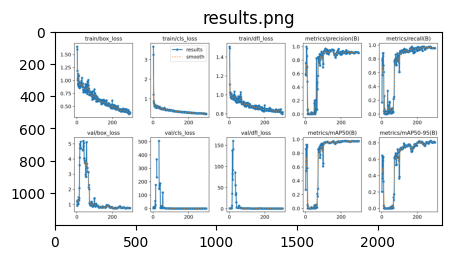

In [8]:
results_display_function(path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/results.png")

### **F1-Confidence Score & Curve :**

In [9]:
print("F1 score:", training_results.box.f1)

F1 score: [    0.93751]


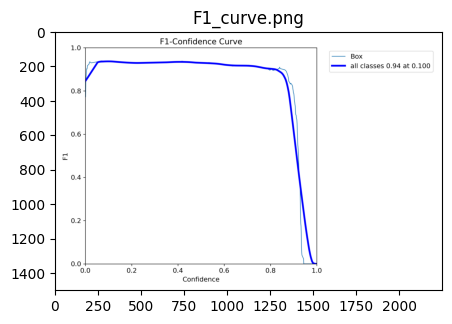

In [10]:
results_display_function(path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/F1_curve.png")

## **Precision Scores & Curves :**

In [11]:
print("Precision Score:", training_results.box.p)

Precision Score: [    0.90258]


In [12]:
print("Class indices with average precision:", training_results.ap_class_index)

Class indices with average precision: [0]


In [13]:
print("Average precision for all classes:", training_results.box.all_ap)

Average precision for all classes: [[    0.97478     0.97478     0.97478     0.97478     0.97478     0.95741     0.91746     0.80846       0.553     0.11403]]


In [14]:
print("Average precision:", training_results.box.ap)

Average precision: [    0.82243]


In [15]:
print("Average precision at IoU=0.50:", training_results.box.ap50)

Average precision at IoU=0.50: [    0.97478]


In [16]:
print("Class indices for average precision:", training_results.box.ap_class_index)

Class indices for average precision: [0]


In [17]:
print("Mean precision:", training_results.box.mp)

Mean precision: 0.9025778909101411


In [18]:
print("Mean average precision:", training_results.box.map)

Mean average precision: 0.8224279405647339


In [19]:
print("Mean average precision at IoU=0.50:", training_results.box.map50)

Mean average precision at IoU=0.50: 0.9747817322024938


In [20]:
print("Mean average precision at IoU=0.75:", training_results.box.map75)

Mean average precision at IoU=0.75: 0.9574086178274414


In [21]:
print("Mean average precision for different IoU thresholds:", training_results.box.maps)

Mean average precision for different IoU thresholds: [    0.82243]


In [22]:
print("Precision values:", training_results.box.prec_values)

Precision values: [[          1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1
            1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1
            1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1           1
            1           1           1   

#### **Precision-Confidence Curve :**

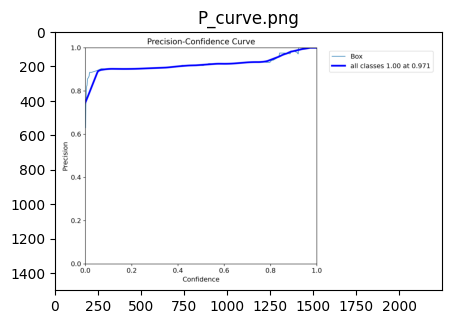

In [23]:
results_display_function(path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/P_curve.png")

#### **Precision-Recall Curve :**

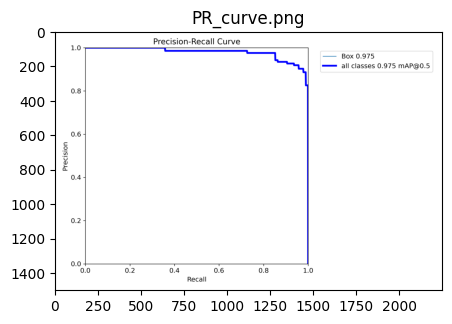

In [24]:
results_display_function(path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/PR_curve.png")

### **Recall Scores & Curve :**

In [25]:
print("Recall:", training_results.box.r)

Recall: [    0.97525]


In [26]:
print("Mean recall:", training_results.box.mr)

Mean recall: 0.9752456020020444


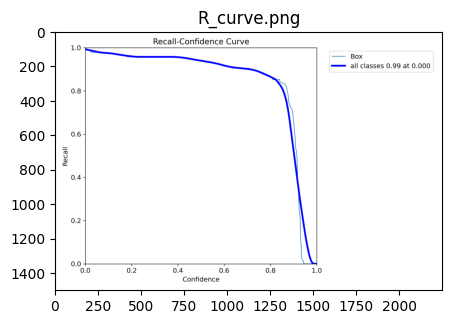

In [27]:
results_display_function(path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/R_curve.png")

### **Confusion Matrix :**

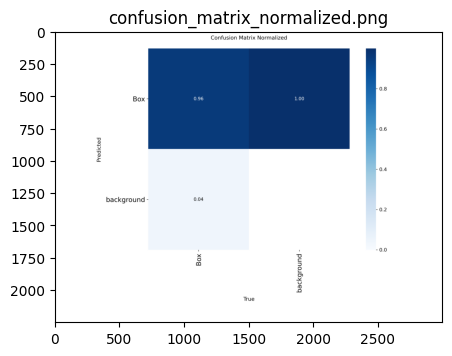

In [28]:
results_display_function(path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/confusion_matrix_normalized.png")

### **Labels & Labels-Correlogram :**

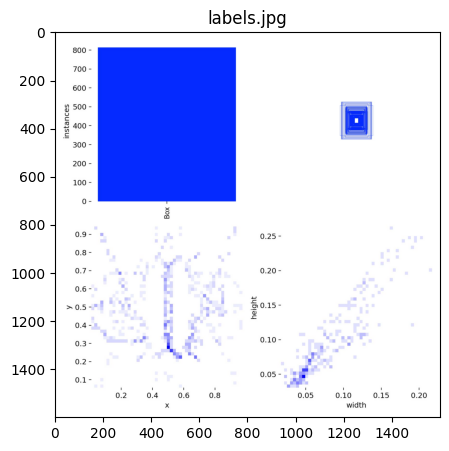

In [29]:
results_display_function(path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/labels.jpg")

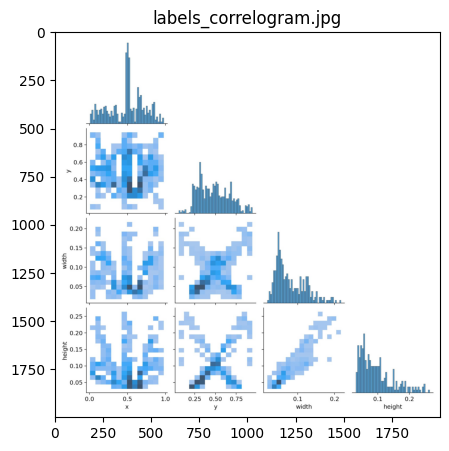

In [30]:
results_display_function(path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/labels_correlogram.jpg")

### **Some Train Batch Sample Result :**

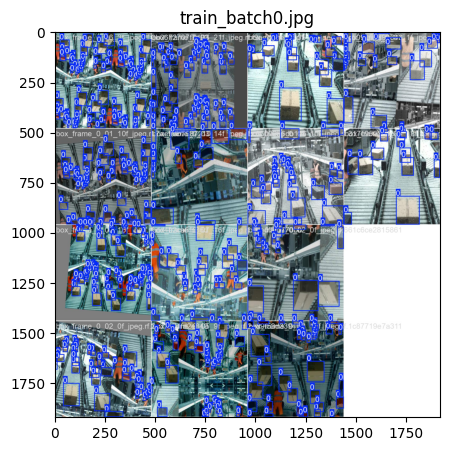

In [31]:
results_display_function(path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/train_batch0.jpg")

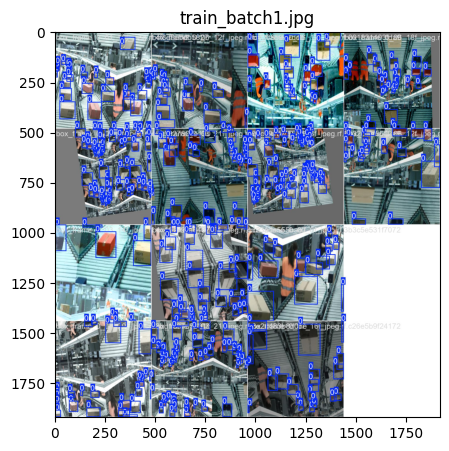

In [32]:
results_display_function(path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/train_batch1.jpg")

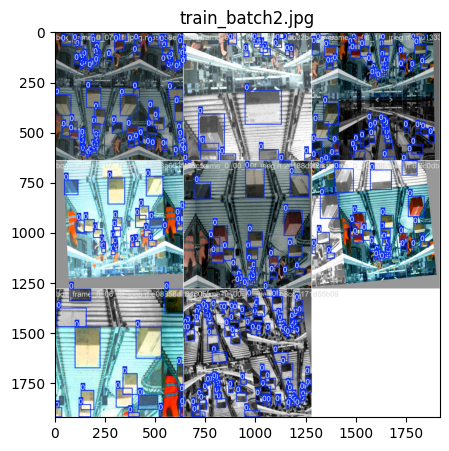

In [33]:
results_display_function(path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/train_batch2.jpg")

### **Some Validation Batch Results :(labels & Predict)**

#### **Batch-0 (labels & Predict) :**

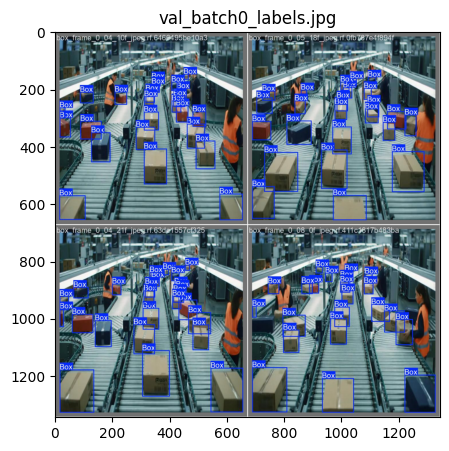

In [34]:
results_display_function(path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/val_batch0_labels.jpg")

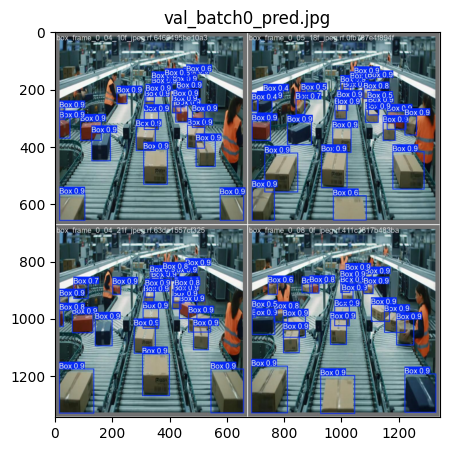

In [35]:
results_display_function(path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/val_batch0_pred.jpg")

# **Running Inference On The Fine-Tuned Model Using Unseen Raw Data :**

In [36]:
def load_and_preprocess_unseen_data(raw_images_path, max_images, conv_output_dir):
    if not raw_images_path or not os.path.exists(raw_images_path):
        print("Images or Image path is not found.")
        return None
    
    print("Continue the unseen test data loading process:")

    img_ext=('.jpg', '.png', '.jpeg', '.bmp', '.gif', '.jfif')

    # create output directory for converted images 
    if not os.path.exists(conv_output_dir):
        os.makedirs(conv_output_dir)
    
    img_file = []

    # Check the input type (like file or directory)
    try:
        if os.path.isfile(raw_images_path) and raw_images_path.lower().endswith(img_ext):
            img_file=[raw_images_path] # Single image
        elif os.path.isdir(raw_images_path):
            img_file=[os.path.join(raw_images_path,img) for img in os.listdir(raw_images_path) if img.lower().endswith(img_ext)] 
            if max_images is not None: # it will execute when max_value will be given 
                img_file = img_file[:max_images] # Take first 'n' number of images 
        else:
            print("'Warning'....Provide a valid image file or directory.")
    
        if not img_file:
            print(f"Not valid Images have been found in test directory [{raw_images_path}].")
            return None

        # convert images to .jpg and save in conv_output_dir , skip for .jpg foles
        converted_img_paths=[]
        for img_path in img_file:
            base_name=os.path.splitext(os.path.basename(img_path))[0]
            out_path=os.path.join(conv_output_dir, f"{base_name}.jpg")

            # if file is already .jpg then use original path
            if img_path.lower().endswith('.jpg'):
                converted_img_paths.append(img_path)
                continue

            # open file and convert other fole to .jpg
            try:
                with Image.open(img_path) as img:
                    # convert to RGB for PNG file 
                    if img.mode in ('RGBA', 'LA', 'P'):
                        img= img.convert('RGB')
                    # save as .jpg file
                    img.save(out_path, 'JPEG', quality=95)
                converted_img_paths.append(out_path)
            except Exception as e:
                print(f"Error occurred during converting image {img_path}: {e}")
                continue 
                
        if not converted_img_paths:
            print("No images were loaded or converted.")
            return None

        print("Images loaded and converted to .jpg successfully and ready for testing.")
        return converted_img_paths
    
    except Exception as e:
        print(f"Error occurred during loading or converting images: {e}")
        return None

In [37]:
# img_file = load_and_preprocess_unseen_data(raw_images_path="/kaggle/input/test-data", max_images=5, conv_output_dir="/kaggle/working/converted_images") # if we take a directory of images and want to run inference on first 20 images
img_files = load_and_preprocess_unseen_data(raw_images_path="/kaggle/input/test-data", max_images=None, conv_output_dir="/kaggle/working/converted_images") # if we take a directory of images and want to run inference on all images 

Continue the unseen test data loading process:
Images loaded and converted to .jpg successfully and ready for testing.


In [38]:
def test_best_model(best_model_path, run_name, testing_images): 
    if not best_model_path or not os.path.exists(best_model_path):
        print("Trained model path is not found.")
        return None
    else:
        print("Continued the best model testing process :")
    
    # Load the best model 
    try:
        best_model=YOLO(best_model_path)
        print("Model loaded successfully.")
    except Exception as e:
        print(f"Error occurred during load the best model {e}")
        return None

    # Create a directory to save the inference result
    try:
        results_dir=f"/kaggle/working/inference/{run_name}_test_data"
        os.makedirs(results_dir, exist_ok=True)
        print("results_dir created  successfully.")
    except Exception as e:
        print(f"Error occurred during create the results_dir {e}")
        return None

    result_paths=[]
    
    # Run the prediction on each test data images and display results 
    for idx, img_path in enumerate(testing_images):
        filename = os.path.basename(img_path)
        print(f"\nProcessing: [{filename}]")
        try:
            results = best_model(img_path, save=True, project=results_dir, name=f"predict{idx+1}")
        except Exception as e:
            print(f"Error occurred during testing with the best model: {e}")
            continue 
        
        try:
            result_file_subdir=os.path.join(results_dir, f"predict{idx+1}")
            result_file_path=os.path.join(result_file_subdir, filename)
            result_paths.append(result_file_path)
        except Exception as e:
            print(f"Error occurred during save the results in this [{result_path}] path: {e}")
            continue
            
    return result_paths # return all process image path

In [39]:
un_result_paths = test_best_model(best_model_path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/weights/best.pt",
                                  run_name=run_name, 
                                  testing_images=img_files)

Continued the best model testing process :
Model loaded successfully.
results_dir created  successfully.

Processing: [box_frame_0_02_20f_jpeg.rf.fd413eebbd8a05d0b52978f049036339.jpg]

image 1/1 /kaggle/input/test-data/box_frame_0_02_20f_jpeg.rf.fd413eebbd8a05d0b52978f049036339.jpg: 640x640 22 Boxs, 36.8ms
Speed: 1.6ms preprocess, 36.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /kaggle/working/inference/Factory-Production-Line-Objects-Detect-Track-And-Count_test_data/predict1

Processing: [box_frame_0_02_9f_jpeg.rf.6d482feb4f9f668b23c4f9311c081255.jpg]

image 1/1 /kaggle/input/test-data/box_frame_0_02_9f_jpeg.rf.6d482feb4f9f668b23c4f9311c081255.jpg: 640x640 25 Boxs, 36.8ms
Speed: 1.5ms preprocess, 36.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /kaggle/working/inference/Factory-Production-Line-Objects-Detect-Track-And-Count_test_data/predict2


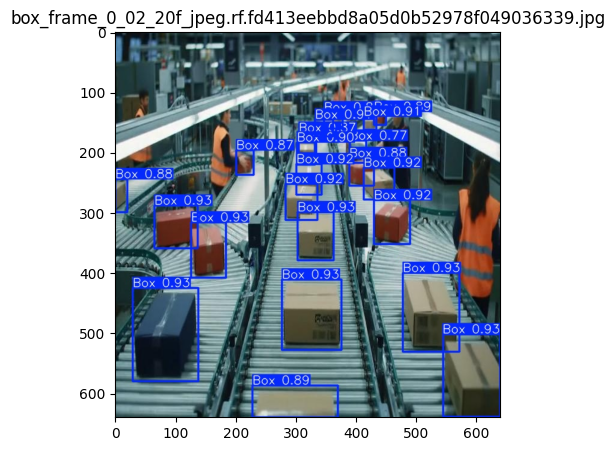

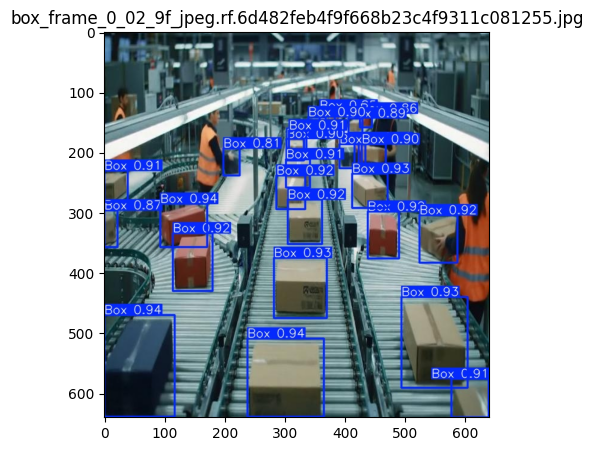

In [40]:
results_display_function(path=un_result_paths)

# **Running Inference On The Fine-Tuned Model Using Unseen Video Data :**

In [41]:
def test_best_model_on_videos(best_model_path, raw_videos_path, output_dir, frame_interval=1, conf_threshold=0.20):

    # Ensure the best model path exists
    if not os.path.exists(best_model_path):
        print(f"Best model path does not exist: [{best_model_path}]")
        return None

    # Ensure the raw videos path exists
    if not os.path.exists(raw_videos_path):
        print(f"Raw videos path does not exist: [{raw_videos_path}]")
        return None

    # Load the best model
    try:
        model = YOLO(best_model_path)
        print(f"Successfully loaded the model from [{best_model_path}]")
    except Exception as e:
        print(f"Failed to load the model from [{best_model_path}]: {e}")
        return None
    
    # Check if input is a single file or a directory
    vdo_format = ('.mp4', '.avi', '.mov', '.mkv', '.webm')
    try:
        if os.path.isfile(raw_videos_path) and raw_videos_path.lower().endswith(vdo_format):
            vdo_files = [raw_videos_path]
            print(f"Found [{len(vdo_files)}] video files to process.")
        elif os.path.isdir(raw_videos_path):
            vdo_files = [os.path.join(raw_videos_path, f) for f in os.listdir(raw_videos_path) if f.lower().endswith(vdo_format)]
            print(f"Found [{len(vdo_files)}] video files in the directory: [{raw_videos_path}]")
        else:
            print(f"Invalid raw videos path: [{raw_videos_path}]")
            return None
        
        if not vdo_files:
            print("No valid video files found in the specified path.")
            return None
        
        # Filter out any empty files
        valid_vdo_files = [f for f in vdo_files if os.path.getsize(f) > 0]
        if len(valid_vdo_files) != len(vdo_files):
            print(f"Filtered out [{len(vdo_files) - len(valid_vdo_files)}] empty files")
        vdo_files = valid_vdo_files
        print(f"Valid video files: [{len(vdo_files)}]")
        # Ensure there are valid video files to process
        if not vdo_files:
            print("No valid video files found after filtering.")
            return None

    except Exception as e:
        print(f"Error while accessing video files in [{raw_videos_path}]: {e}")
        return None
    
    # Create output directory
    try:
        os.makedirs(output_dir, exist_ok=True)
        print(f"Output directory created or exist at: [{output_dir}]")
    except Exception as e:
        print(f"Failed to create output directory [{output_dir}]: {e}")    
        return None
    
    # Process each video file
    print(f"Running inference on [{len(vdo_files)}] video........................")
    
    for vdo_idx, vdo_path in enumerate(vdo_files):
        vdo_filename = os.path.basename(vdo_path)
        vdo_name = os.path.splitext(vdo_filename)[0]
        print(f"Processing video [{vdo_idx + 1}/{len(vdo_files)}]: {vdo_filename}")
        
        # Initialize video objects
        vdo = None
        out = None
        
        try:
            # Create output video save path
            output_video_path = os.path.join(output_dir, f"{vdo_name}_predictions.mp4")
            print(f"Output video will be saved to: [{output_video_path}]")
        
            # Open the video file
            vdo = cv2.VideoCapture(vdo_path)
            if not vdo.isOpened():
                print(f"Failed to open video file: [{vdo_path}]")
                continue
            print(f"Successfully opened video file: [{vdo_path}]")

            # Get video properties
            fps = vdo.get(cv2.CAP_PROP_FPS)
            width = int(vdo.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(vdo.get(cv2.CAP_PROP_FRAME_HEIGHT))
            total_frames = int(vdo.get(cv2.CAP_PROP_FRAME_COUNT))
            print(f"Video properties - FPS: [{fps}], Width: [{width}], Height: [{height}], Total Frames: [{total_frames}]")
        
            # Initialize video writer
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))
            if not out.isOpened():
                print(f"Failed to initialize video writer for [{output_video_path}]")
                continue
            print(f"Video writer initialized successfully for output video: [{output_video_path}]")

            # Process frames
            frame_count = 0
            processed_count = 0
            
            print(f"Starting frame processing for video: [{vdo_filename}]")
       
            while vdo.isOpened():
                ret, frame = vdo.read()
                if not ret:
                    print(f"End of video or error reading frame at count: [{frame_count}]")
                    break
                
                # Process every 'frame_interval' frames
                if frame_count % frame_interval == 0:
                    try:
                        # Run prediction on the current frame
                        print(f"Processing frame [{frame_count}] for video: [{vdo_filename}]")
                        results = model.predict(frame, conf=conf_threshold, verbose=False)
                        
                        # Get the annotations from the results
                        annotated_frame = results[0].plot()
                        
                        # Save the frame with predictions
                        frames_dir = os.path.join(output_dir, "frames predictions")
                        os.makedirs(frames_dir, exist_ok=True)
                        frame_output_path = os.path.join(frames_dir, f"{vdo_name}_frame_{frame_count:06d}.jpg")
                        cv2.imwrite(frame_output_path, annotated_frame)  
                        print(f"Saved annotated frame to: [{frame_output_path}]")
                        
                        processed_count += 1
                        
                        # Print progress
                        if processed_count % 50 == 0:
                            progress = (processed_count * frame_interval / total_frames) * 100
                            print(f"Progress: {progress:.2f}% ({processed_count} processed frames, current frame: {frame_count}/{total_frames})")
                            
                    except Exception as e:
                        print(f"Error processing frame [{frame_count}] for video [{vdo_filename}]: {e}")
                        # Use original frame if processing fails
                        annotated_frame = frame
                        
                else:
                    # For frames we don't process, use the original frame
                    annotated_frame = frame
                
                # Write frame to output video (either processed or original)
                out.write(annotated_frame)
                if frame_count % frame_interval == 0:
                    print(f"Annotated frame [{frame_count}] written to output video.")
                frame_count += 1    
                    
        except Exception as e:
            print(f"Error while processing video [{vdo_filename}]: {e}")
        
        finally:
            # Release resources safely
            if vdo is not None:
                try:
                    vdo.release()
                    print(f"Released video capture for video: [{vdo_filename}]")
                except Exception as e:  
                    print(f"Error releasing video capture for [{vdo_filename}]: {e}")
                    
            if out is not None:
                try:
                    out.release()
                    print(f"Released video writer for video: [{vdo_filename}]")
                except Exception as e:
                    print(f"Error releasing video writer for [{vdo_filename}]: {e}")
        
        print(f"Processed [{processed_count}] frames from video [{vdo_idx+1}/{len(vdo_files)}]")
        print(f"Output video saved to: [{output_video_path}]")
        
    print(f"All videos processed. Output saved to: [{output_dir}]")
    return output_dir

In [42]:
test_best_model_on_videos(best_model_path="/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/weights/best.pt",
                          raw_videos_path="/kaggle/input/video-test-data/box.mp4", 
                          output_dir=f"/kaggle/working/inference/{run_name}_video_test_data", 
                          frame_interval=1,
                          conf_threshold=0.20)

Successfully loaded the model from [/kaggle/working/runs/detect/Factory-Production-Line-Objects-Detect-Track-And-Count/weights/best.pt]
Found [1] video files to process.
Valid video files: [1]
Output directory created or exist at: [/kaggle/working/inference/Factory-Production-Line-Objects-Detect-Track-And-Count_video_test_data]
Running inference on [1] video........................
Processing video [1/1]: box.mp4
Output video will be saved to: [/kaggle/working/inference/Factory-Production-Line-Objects-Detect-Track-And-Count_video_test_data/box_predictions.mp4]
Successfully opened video file: [/kaggle/input/video-test-data/box.mp4]
Video properties - FPS: [24.0], Width: [1280], Height: [720], Total Frames: [192]
Video writer initialized successfully for output video: [/kaggle/working/inference/Factory-Production-Line-Objects-Detect-Track-And-Count_video_test_data/box_predictions.mp4]
Starting frame processing for video: [box.mp4]
Processing frame [0] for video: [box.mp4]
Saved annotated

'/kaggle/working/inference/Factory-Production-Line-Objects-Detect-Track-And-Count_video_test_data'